In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [16]:
# 데이터 불러오기
free_apps = pd.read_csv('Free_apps.csv')
grossing_apps = pd.read_csv('Grossing_apps.csv')

In [17]:
# 데이터 병합
apps_data = pd.concat([free_apps, grossing_apps])

# 중복된 행 제거
apps_data = apps_data.drop_duplicates(subset=['App ID'])

In [18]:
# 필요한 열만 선택
apps_data = apps_data[['Category', 'Description']]

In [19]:
# 결측치 제거
apps_data.dropna(subset=['Category', 'Description'], inplace=True)

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [23]:
# 클러스터링 수행 (예: 7개의 클러스터)
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(apps_data['Description'])

In [25]:
from sklearn.cluster import KMeans

# 클러스터 개수 설정 (예: 7개의 상위 카테고리)
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

# 클러스터 결과를 데이터프레임에 추가
apps_data['Cluster'] = clusters

In [26]:
# 클러스터별로 카테고리 확인
for cluster_num in range(n_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_data = apps_data[apps_data['Cluster'] == cluster_num]
    print(cluster_data['Category'].value_counts())
    print("\n")

Cluster 0:
Category
Shopping                   3
Social                     3
Entertainment              3
Video Players & Editors    2
Travel & Local             1
Productivity               1
Music & Audio              1
Education                  1
Name: count, dtype: int64


Cluster 1:
Category
Shopping             3
Lifestyle            3
Travel & Local       1
Maps & Navigation    1
Name: count, dtype: int64


Cluster 2:
Category
Entertainment       5
Shopping            1
News & Magazines    1
Food & Drink        1
Music & Audio       1
Name: count, dtype: int64


Cluster 3:
Category
Finance                    5
Travel & Local             4
Shopping                   2
Maps & Navigation          1
Communication              1
Lifestyle                  1
Auto & Vehicles            1
Video Players & Editors    1
Name: count, dtype: int64


Cluster 4:
Category
Productivity    3
Tools           2
Name: count, dtype: int64


Cluster 5:
Category
Finance              9
Tools          

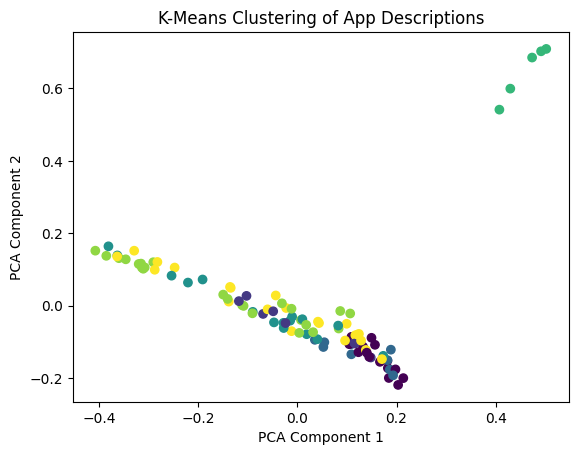

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA로 차원 축소 후 시각화
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_tfidf.toarray())

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of App Descriptions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [28]:
# 클러스터 번호를 상위 카테고리로 사용
apps_data['Super_Category'] = apps_data['Cluster']

# 상위 카테고리별로 그룹화된 데이터 확인
grouped_by_super_category = apps_data.groupby('Super_Category')

for super_category, group in grouped_by_super_category:
    print(f"Super Category (Cluster): {super_category}")
    print(group['Category'].value_counts())
    print("\n")

Super Category (Cluster): 0
Category
Shopping                   3
Social                     3
Entertainment              3
Video Players & Editors    2
Travel & Local             1
Productivity               1
Music & Audio              1
Education                  1
Name: count, dtype: int64


Super Category (Cluster): 1
Category
Shopping             3
Lifestyle            3
Travel & Local       1
Maps & Navigation    1
Name: count, dtype: int64


Super Category (Cluster): 2
Category
Entertainment       5
Shopping            1
News & Magazines    1
Food & Drink        1
Music & Audio       1
Name: count, dtype: int64


Super Category (Cluster): 3
Category
Finance                    5
Travel & Local             4
Shopping                   2
Maps & Navigation          1
Communication              1
Lifestyle                  1
Auto & Vehicles            1
Video Players & Editors    1
Name: count, dtype: int64


Super Category (Cluster): 4
Category
Productivity    3
Tools           2
N

In [29]:
apps_data.head()

,Category,Description,Cluster,Super_Category
0,Video Players & Editors,TikTok Lite is a global video community that i...,0,0
1,Health & Fitness,1. The mobile health insurance card app is a p...,6,6
2,Shopping,Shop on Temu for exclusive offers. \n\nNo matt...,0,0
3,Social,Say more with Threads — Instagram’s text-based...,0,0
4,Finance,With Kakao Pay\nSo that everyone can finance\n...,5,5


In [30]:
import numpy as np

In [31]:
# 클러스터별 주요 키워드 추출 함수
def get_top_keywords(tfidf_matrix, clusters, top_n=5):
    # 클러스터 중심의 TF-IDF 가중치 합계 계산
    cluster_centers = np.zeros((np.unique(clusters).size, tfidf_matrix.shape[1]))
    
    for cluster in np.unique(clusters):
        cluster_centers[cluster] = tfidf_matrix[clusters == cluster].mean(axis=0)
    
    # 각 클러스터의 주요 키워드 추출
    terms = vectorizer.get_feature_names_out()
    top_keywords = []
    
    for cluster in range(cluster_centers.shape[0]):
        center = cluster_centers[cluster]
        top_indices = center.argsort()[::-1][:top_n]  # 상위 n개의 인덱스
        keywords = [terms[i] for i in top_indices]  # 상위 n개의 키워드
        top_keywords.append(keywords)
    
    return top_keywords

In [32]:
# 클러스터별 상위 5개 키워드 추출
top_keywords_per_cluster = get_top_keywords(X_tfidf, clusters, top_n=5)


In [33]:
# 클러스터별 주요 키워드 출력
for cluster_num, keywords in enumerate(top_keywords_per_cluster):
    print(f"Cluster {cluster_num} Top Keywords: {', '.join(keywords)}")

Cluster 0 Top Keywords: instagram, videos, com, tiktok, https
Cluster 1 Top Keywords: uber, daiso, product, gs, agoda
Cluster 2 Top Keywords: coupang, movies, tv, news, shows
Cluster 3 Top Keywords: kakao, service, information, bank, accommodation
Cluster 4 Top Keywords: pdf, reader, viewer, files, document
Cluster 5 Top Keywords: card, pay, use, used, app
Cluster 6 Top Keywords: shinhan, health, blood, mobile, app


In [34]:
# 키워드 기반으로 상위 카테고리 이름 생성
def generate_category_name(keywords):
    return " & ".join(keywords[:2])  # 상위 2개의 키워드를 연결하여 이름 생성

In [35]:
# 클러스터별 상위 카테고리 이름 생성 및 출력
for cluster_num, keywords in enumerate(top_keywords_per_cluster):
    category_name = generate_category_name(keywords)
    print(f"Cluster {cluster_num} Name: {category_name}")

Cluster 0 Name: instagram & videos
Cluster 1 Name: uber & daiso
Cluster 2 Name: coupang & movies
Cluster 3 Name: kakao & service
Cluster 4 Name: pdf & reader
Cluster 5 Name: card & pay
Cluster 6 Name: shinhan & health
